# Anomaly Analysis

In [12]:
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt

In [13]:
reference_volt_curves= pd.read_pickle("../data/reference/reference_volt_curves.pkl")  

In [14]:
df= pd.read_pickle("../data/processed/with_stat_anomalies.pkl")  

In [47]:
ML_curr= pd.read_pickle("../data/processed/ML_current_with_anomalies.pkl")
ML_volt= pd.read_pickle("../data/processed/ML_voltage_with_anomalies.pkl") 

## Analisi anomalie di Voltage

In [16]:
# creazione df con solo le feature che interessano current
df_volt=df.drop(["index","n_current_outliers","%current_anomalies"],axis=1).join(ML_volt[["iForest_volt","LOF_volt","SVM_volt"]])

### Plot delle curve per specfico spotname

In [49]:
val_indice=df_volt.loc[['60185_0_00']]
val_indice.columns

Index(['VoltageCurve', 'CurrentCurve', 'voltage_drop', 'voltage_spike',
       'n_voltage_outliers', '%volt_anomalies', 'iForest_volt', 'LOF_volt',
       'SVM_volt'],
      dtype='object')

#### Plot sulla base di voltage_drop

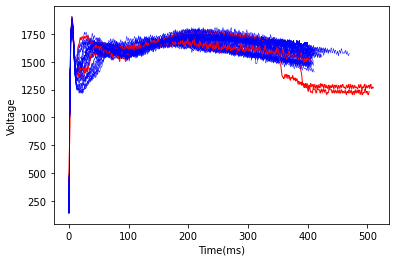

In [20]:
import matplotlib.pyplot as plt
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["voltage_drop"][i]==False:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  

#### Plot sulla base di %volt_anomalies

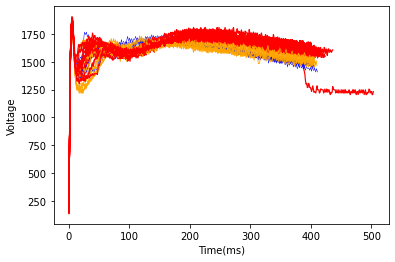

In [34]:
#### Plot sulla base di voltage_drop
import matplotlib.pyplot as plt
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["%volt_anomalies"][i]>40:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1.2)
    if 5<val_indice["%volt_anomalies"][i]<40:
        colore="orange"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%volt_anomalies"][i]<5:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)

#### Plot sulla base di iForest

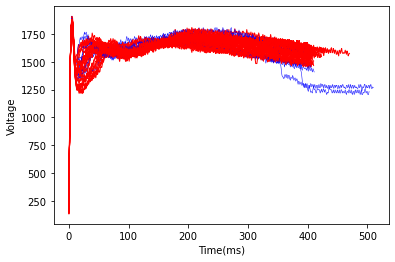

In [35]:
import matplotlib.pyplot as plt
plt.xlabel("Time(ms)")
plt.ylabel("Voltage")
for i in range(50):
    if val_indice["iForest_volt"][i]==1:
        colore="blue"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["VoltageCurve"][i],c=colore,linewidth=1)  

## Analisi anomalie di Current

In [36]:
# creazione df con solo le feature che interessano current
df_curr=df.drop(["index","VoltageCurve","voltage_drop","voltage_spike","n_voltage_outliers","%volt_anomalies"],axis=1).join(ML_curr[["iForest_curr","LOF_curr","SVM_curr"]])
df_curr.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

In [43]:
df_curr

CurrentCurve  \
spotName   TimeStamp                                                                
60000_0_00 2019-09-17 17:56:02  [302, 1999, 3574, 4694, 5512, 6148, 6542, 6815...   
           2019-09-17 17:56:07  [303, 2002, 3549, 4702, 5551, 6340, 6886, 7189...   
           2019-09-17 18:05:02  [305, 2017, 3607, 4738, 5656, 6389, 6848, 7154...   
           2019-09-17 18:42:46  [333, 2033, 3641, 4795, 5614, 6312, 6767, 7040...   
           2019-09-17 18:59:36  [302, 1996, 3569, 4719, 5536, 6262, 6837, 7109...   
...                                                                           ...   
60185_0_00 2020-05-06 14:06:47  [354, 2200, 4081, 5500, 6565, 7239, 7594, 7842...   
           2020-05-06 14:18:28  [337, 2262, 4288, 5773, 6786, 7563, 8069, 8205...   
           2020-05-27 09:15:45  [337, 2193, 4116, 5499, 6512, 7220, 7490, 7726...   
           2020-05-27 09:27:57  [333, 2265, 4197, 5630, 6562, 7162, 7662, 7928...   
           2020-05-27 10:18:20  [317, 2188, 4059, 5471, 6565, 7200, 7518, 7730...   

                                n_current_outliers  %current_anomalies  \
spotName   TimeStamp                                                     
60000_0_00 2019-09-17 17:56:02                  20                   5   
           2019-09-17 17:56:07                   9                   2   
           2019-09-17 18:05:02                   0                   0   
           2019-09-17 18:42:46                   5                   1   
           2019-09-17 18:59:36                  13                   3   
...                                            ...                 ...   
60185_0_00 2020-05-06 14:06:47                 312                  77   
           2020-05-06 14:18:28                  98                  24   
           2020-05-27 09:15:45                  67                  17   
           2020-05-27 09:27:57                  61                  15   
           2020-05-27 10:18:20                 335                  80   

                                iForest_curr  LOF_curr  SVM_curr  
spotName   TimeStamp                                              
60000_0_00 2019-09-17 17:56:02             1         1         1  
           2019-09-17 17:56:07             1         1         1  
           2019-09-17 18:05:02             1         1         1  
           2019-09-17 18:42:46             1         1         1  
           2019-09-17 18:59:36             1         1         1  
...                                      ...       ...       ...  
60185_0_00 2020-05-06 14:06:47             1         1         1  
           2020-05-06 14:18:28             1         1         1  
           2020-05-27 09:15:45             1         1         1  
           2020-05-27 09:27:57             1         1         1  
           2020-05-27 10:18:20             1         1         1  

[170903 rows x 6 columns]

### Plot delle curve per specfico spotname

In [37]:
val_indice=df_curr.loc[['60185_0_00']]
val_indice.columns

Index(['CurrentCurve', 'n_current_outliers', '%current_anomalies',
       'iForest_curr', 'LOF_curr', 'SVM_curr'],
      dtype='object')

#### Plot sulla base di %volt_anomalies

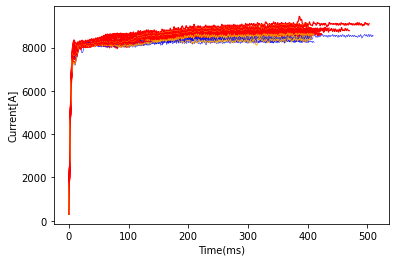

In [44]:
#### Plot sulla base di voltage_drop
import matplotlib.pyplot as plt
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["%current_anomalies"][i]>50:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1.2)
    if 20<val_indice["%current_anomalies"][i]<50:
        colore="orange"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.8)  
    if val_indice["%current_anomalies"][i]<20:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
plt.plt()

#### Plot sulla base di iForest

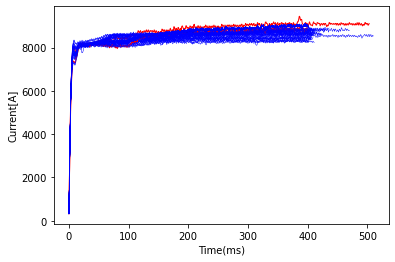

In [40]:
import matplotlib.pyplot as plt
plt.xlabel("Time(ms)")
plt.ylabel("Current[A]")
for i in range(50):
    if val_indice["iForest_curr"][i]==1:
        colore="blue"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=0.5)
    else:
        colore="red"
        plt.plot(val_indice["CurrentCurve"][i],c=colore,linewidth=1)  